In [78]:
!pip install xlrd

In [79]:
#import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import numpy as np

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [80]:
#bring in file to environment
df=pd.read_excel('Absenteeism_at_work.xls')

In [81]:
#observe first five rows of the dataset
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [82]:
#get the shape of the dataset
df.shape

(740, 21)

In [83]:
 #Take a look at the data types and also see if we have any missing data and all other information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [84]:
#get the basic statistics on the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.0,9.0,18.0,28.0,36.0
Reason for absence,740.0,19.216216,8.433406,0.0,13.0,23.0,26.0,28.0
Month of absence,740.0,6.324324,3.436287,0.0,3.0,6.0,9.0,12.0
Day of the week,740.0,3.914865,1.421675,2.0,3.0,4.0,5.0,6.0
Seasons,740.0,2.544595,1.111831,1.0,2.0,3.0,4.0,4.0
Transportation expense,740.0,221.329730,66.952223,118.0,179.0,225.0,260.0,388.0
Distance from Residence to Work,740.0,29.631081,14.836788,5.0,16.0,26.0,50.0,52.0
Service time,740.0,12.554054,4.384873,1.0,9.0,13.0,16.0,29.0
Age,740.0,36.450000,6.478772,27.0,31.0,37.0,40.0,58.0
Work load Average/day,740.0,271490.235135,39058.116188,205917.0,244387.0,264249.0,294217.0,378884.0


In [85]:
#check for duplicated rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
735    False
736    False
737    False
738    False
739    False
Length: 740, dtype: bool

In [86]:
 #observe the target column
df['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
5        7
40       7
32       6
64       3
80       3
120      3
56       2
112      2
7        1
104      1
48       1
Name: Absenteeism time in hours, dtype: int64

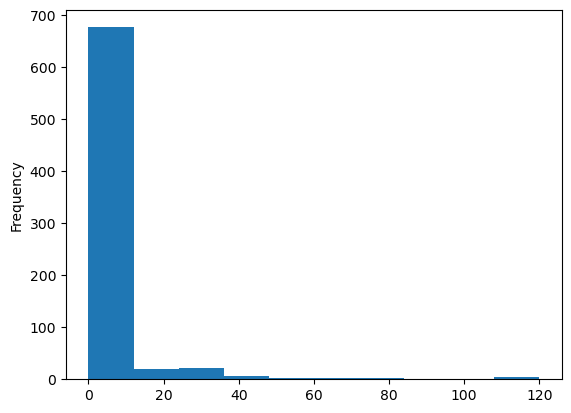

In [87]:
# observe the distribution of the target column
df['Absenteeism time in hours'].plot(kind='hist'); 

In [88]:
#view the spread of the target column
df['Absenteeism time in hours'].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

In [89]:
#creates a new column in the DataFrame df called 'mask' which contains boolean values that indicate if the target column is more than 3
df['mask']=df['Absenteeism time in hours']>3

In [90]:
#take total number of observations with over 3 hours of absence
num_rows_true = (df['Absenteeism time in hours'] > 3).sum()
f'{num_rows_true} participants were absent more than three hours '

'339 participants were absent more than three hours '

In [91]:
#count the number of rows with less than 3 hour absence in the dataset
num_rows_true = (df['Absenteeism time in hours'] < 3).sum()
f'{num_rows_true} members were absent for less than three hours'

'289 members were absent for less than three hours'

In [92]:
#change to interger values - 1 for true, 0 for false
df['Absent']=df['mask'].astype(int) 

In [93]:
 #check
df['Absent'].head()

0    1
1    0
2    0
3    1
4    0
Name: Absent, dtype: int32

In [94]:
#create a mask subsetting the observations where Absent for over 3 hours = True 
mask = df['Absent']==1 

df_Absentees = df[mask]

df_Absentees.shape

(339, 23)

In [95]:
#checking the column
df['Absent']

0      1
1      0
2      0
3      1
4      0
      ..
735    1
736    1
737    0
738    0
739    0
Name: Absent, Length: 740, dtype: int32

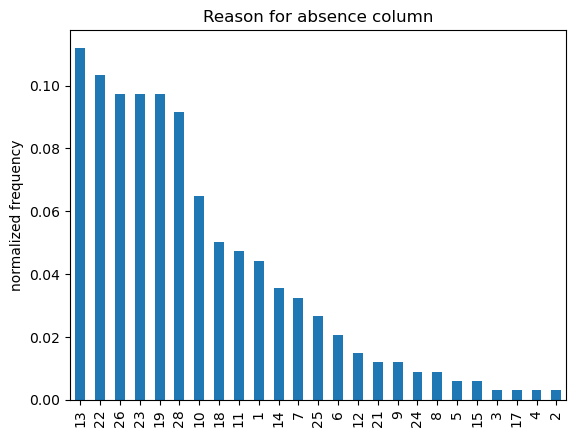

In [96]:
#explore the reason for absence column
df_Absentees['Reason for absence'].value_counts(normalize = True).plot(kind='bar', title= 'Reason for absence column', ylabel='normalized frequency'); 

In [97]:
 #Explore the ID column
df['ID'].nunique()

36

In [98]:

#collapse the column to reduce dimensionality and help with explainability
df['Medical Reasons']=(df['Reason for absence']>1).astype(int)

In [99]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,mask,Absent,Medical Reasons
0,11,26,7,3,1,289,36,13,33,239554,...,1,0,1,90,172,30,4,True,1,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,0,0,98,178,31,0,False,0,0
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,0,89,170,31,2,False,0,1
3,7,7,7,5,1,279,5,14,39,239554,...,1,1,0,68,168,24,4,True,1,1
4,11,23,7,5,1,289,36,13,33,239554,...,1,0,1,90,172,30,2,False,0,1


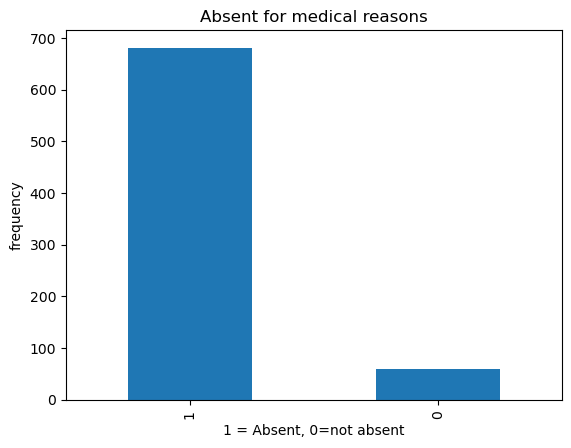

In [100]:
#observe the medical reasons column
df['Medical Reasons'].value_counts().plot(kind='bar', title='Absent for medical reasons', xlabel='1 = Absent, 0=not absent', ylabel = 'frequency');

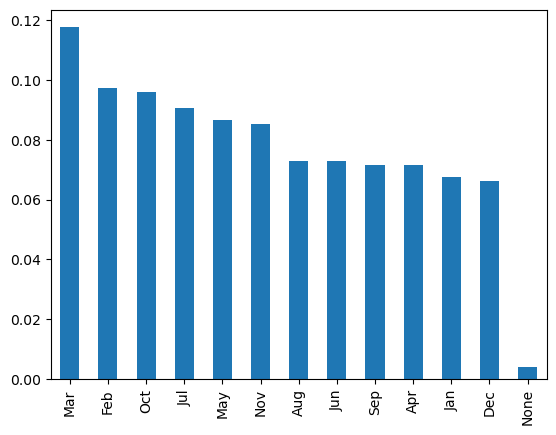

In [101]:
 #Explore month of absence column
df['Month of absence'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec', 0:'None'}).value_counts(normalize=True).plot(kind='bar');

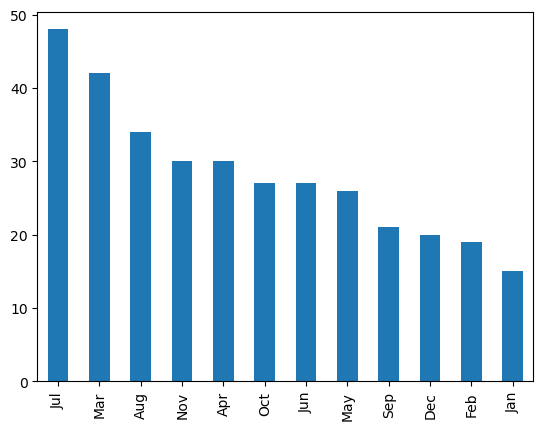

In [102]:
#observe the distribution of absence by month
df_Absentees['Month of absence'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec', 0:'None'}).value_counts().plot(kind='bar');

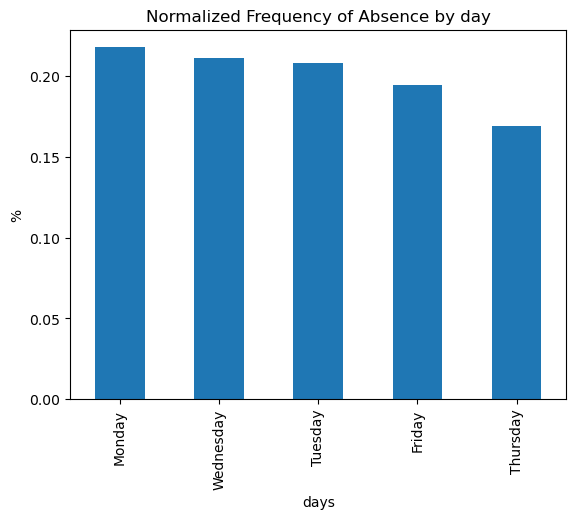

In [103]:
#Explore the most likely days of absence
df['Day of the week'].replace({2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}).value_counts(normalize=True).plot(kind='bar', title = 'Normalized Frequency of Absence by day', xlabel = 'days', ylabel = '%'); 

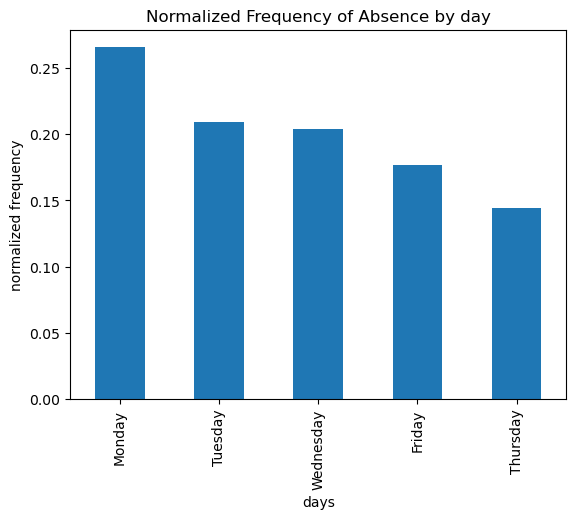

In [104]:
#explore the absence column by days of the week
df_Absentees['Day of the week'].replace({2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}).value_counts(normalize=True).plot(kind='bar', title = 'Normalized Frequency of Absence by day', xlabel = 'days', ylabel = 'normalized frequency');

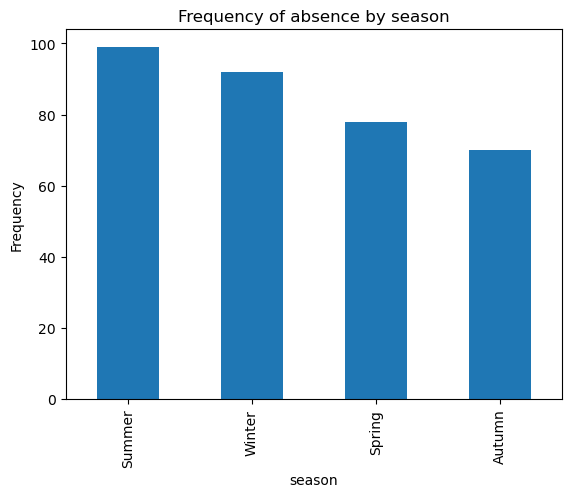

In [105]:
 #Explore seasons column
df_Absentees['Seasons'].replace({1:'Summer', 2: 'Autumn', 3:'Winter', 4:'Spring'}).value_counts().plot(kind='bar', title = 'Frequency of absence by season', xlabel='season', ylabel='Frequency');

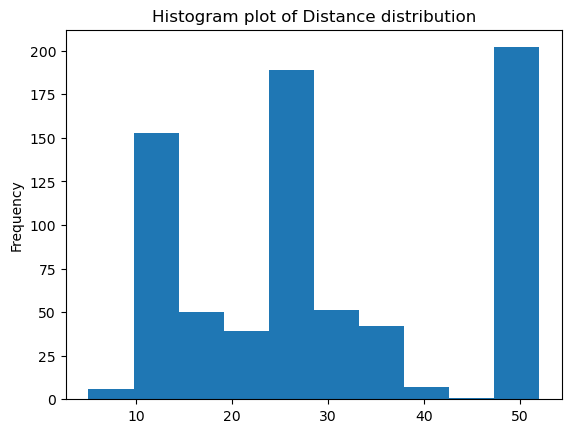

In [106]:
#explore the distance feom residence to work column
df['Distance from Residence to Work'].plot(kind='hist', title='Histogram plot of Distance distribution', xlabel='Distance from work', ylabel='Number of people');

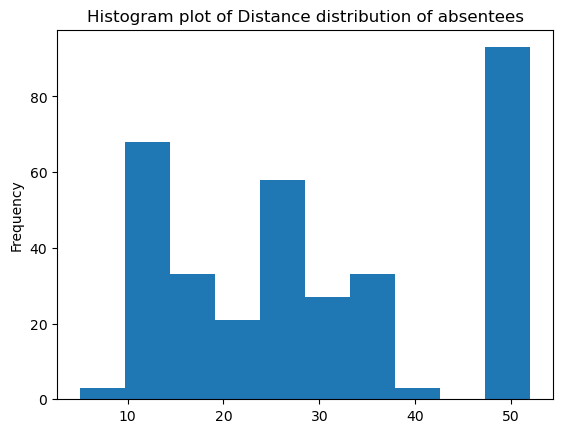

In [107]:
#explore the relationship between distance to work and absence
df_Absentees['Distance from Residence to Work'].plot(kind='hist', title='Histogram plot of Distance distribution of absentees', xlabel='Distance from work', ylabel='Number of people');

<Axes: xlabel='Distance from Residence to Work', ylabel='Count'>

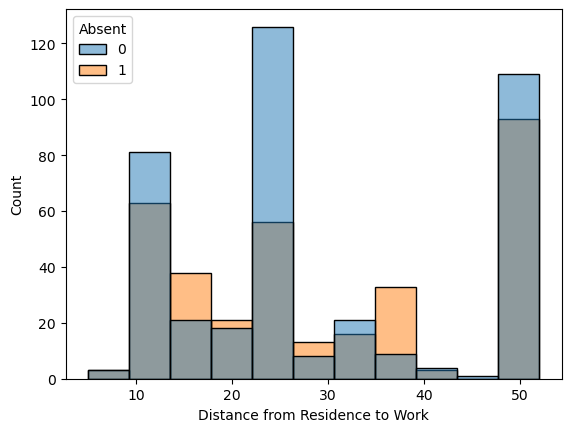

In [108]:
#exploring the distance to work column by the absence column
sns.histplot(x='Distance from Residence to Work', hue='Absent', data=df)

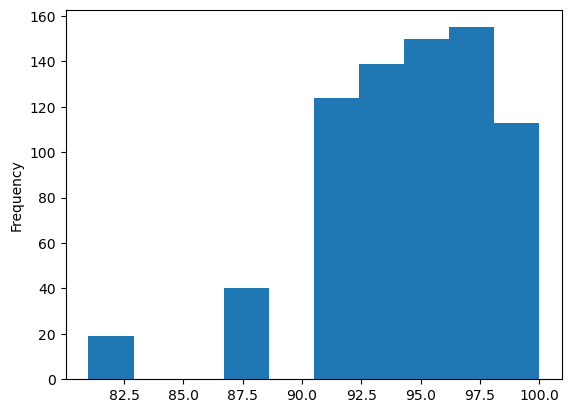

In [109]:
#explore the hit target column
df['Hit target'].plot(kind='hist');

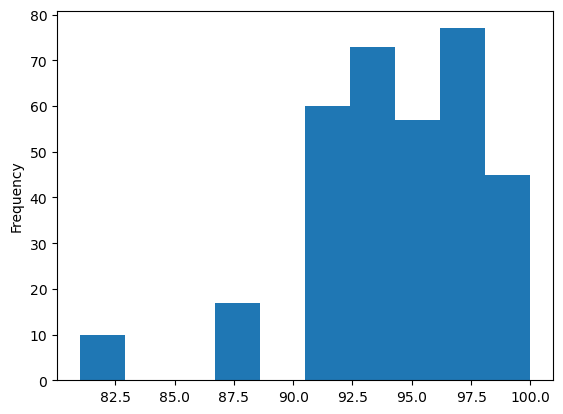

In [110]:
#observing the hit target column of the absentees
df_Absentees['Hit target'].plot(kind='hist');

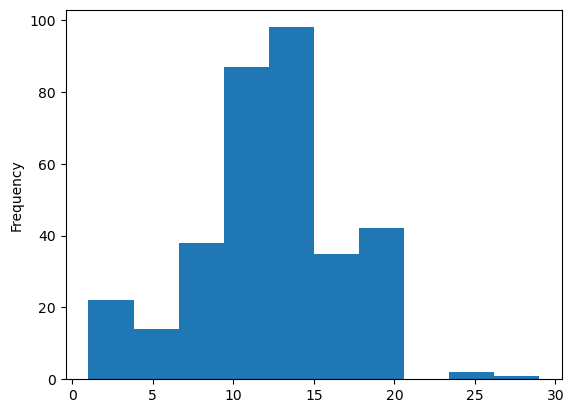

In [111]:
#obseving the distribution of the service time of the absentees
df_Absentees['Service time'].plot(kind='hist', xlabel='Service time in years');

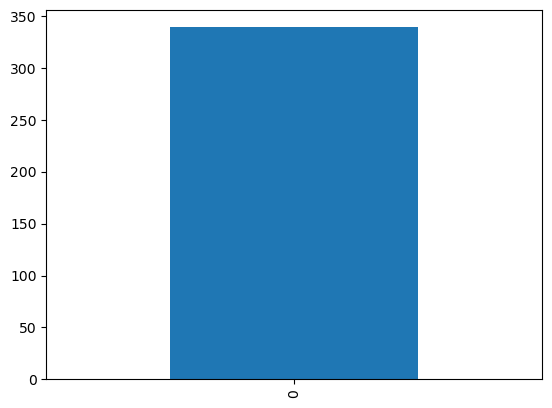

In [112]:
#observing the discipliinary failure column for the absentees
df_Absentees['Disciplinary failure'].value_counts().plot(kind='bar');

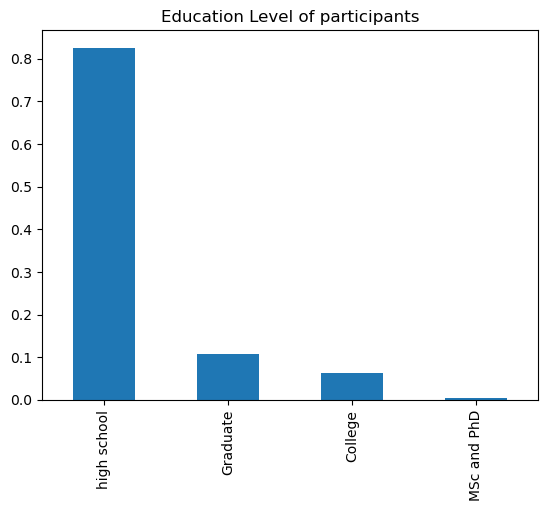

In [113]:
#observation of the education distribution of the participants
df['Education'].replace({1:'high school', 2:'College', 3:'Graduate', 4:'MSc and PhD'}).value_counts(normalize=True).plot(kind='bar', title='Education Level of participants'); #Observing the education column

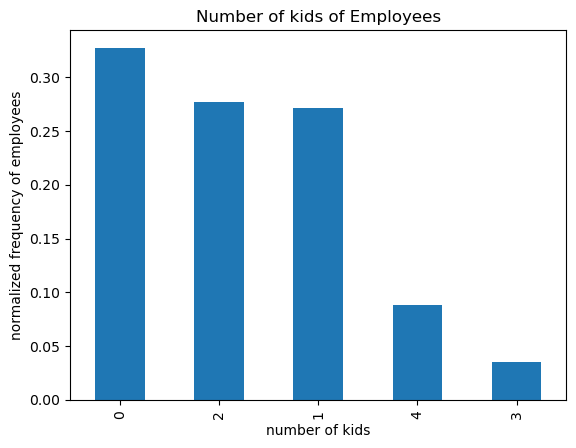

In [114]:
#Looking at the distribution of the number of children amongst the absentees
df_Absentees['Son'].value_counts(normalize=True).plot(kind='bar', xlabel='number of kids', ylabel='normalized frequency of employees', title='Number of kids of Employees');

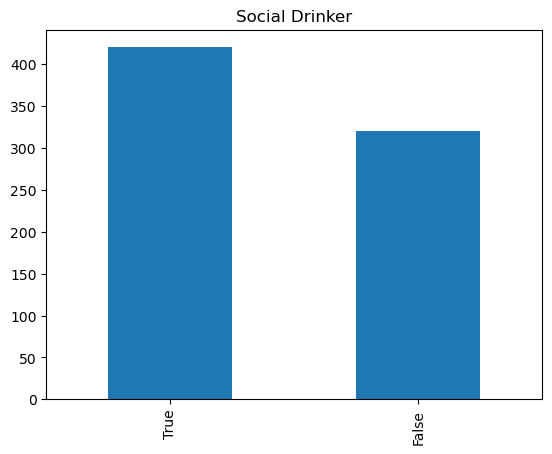

In [115]:
#looking at the social drinker colum within the dataset
df['Social drinker'].replace({1:'True', 0:'False'}).value_counts().plot(kind='bar', title='Social Drinker');

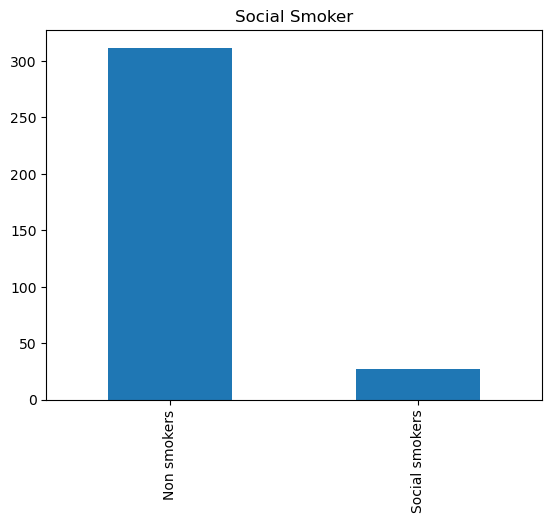

In [116]:
#looking at the social smoker xolumn among the absentees
df_Absentees['Social smoker'].replace({1:'Social smokers', 0:'Non smokers'}).value_counts().plot(kind='bar', title = 'Social Smoker');

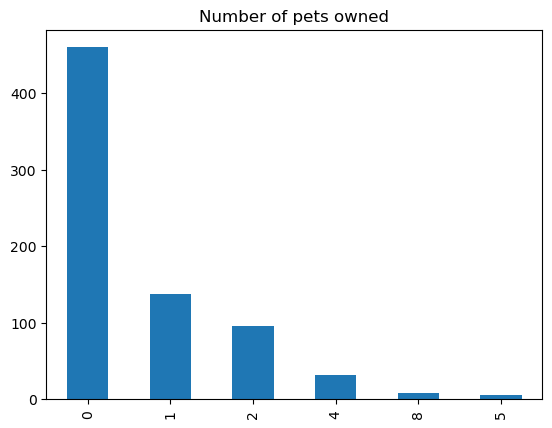

In [117]:
#observe the distribution of the number of pets among the dataset participants
df['Pet'].value_counts().plot(kind='bar', title='Number of pets owned');

<Axes: >

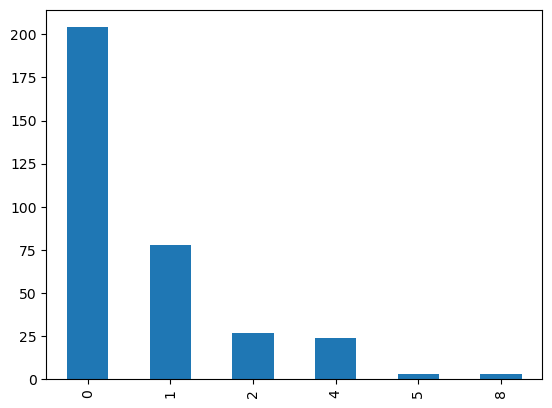

In [118]:
#observe the number of pets owned by absentees
df_Absentees['Pet'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

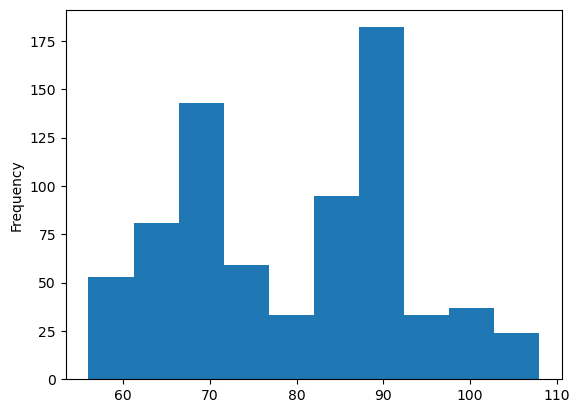

In [119]:
#looking at the weight distribution of the participants of the dataset
df['Weight'].plot(kind='hist')

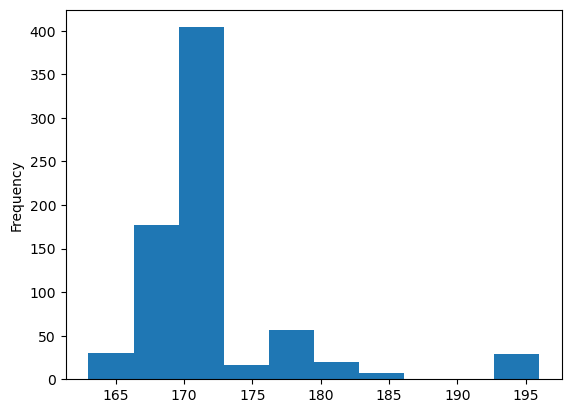

In [120]:
#looking at the height distribution of the members of the dataset
df['Height'].plot(kind='hist');

<Axes: ylabel='Frequency'>

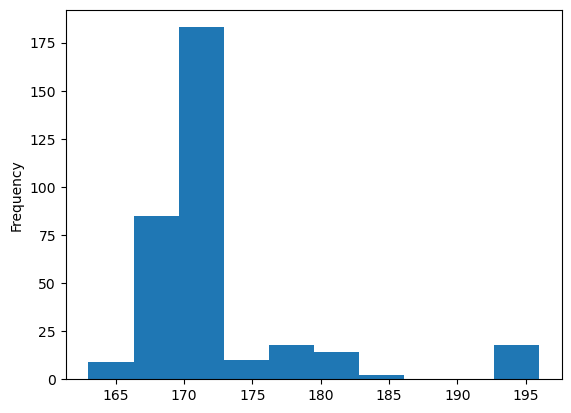

In [121]:
#observe the distribution of the height within the absentees
df_Absentees['Height'].plot(kind='hist')

In [122]:
#observe the bmi distribution among the participants
df['Body mass index'].describe()

count    740.000000
mean      26.677027
std        4.285452
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: Body mass index, dtype: float64

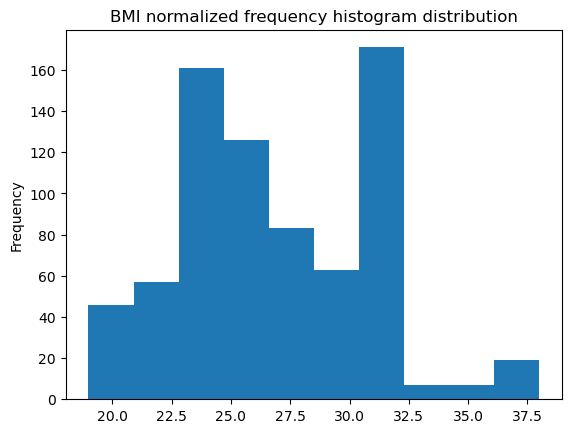

In [123]:
#observe the bmi distribution among the participants
df['Body mass index'].plot(kind='hist', title='BMI normalized frequency histogram distribution');

In [124]:
#obseve the bmi of the absentees
df_Absentees['Body mass index'].describe()

count    339.000000
mean      26.560472
std        4.082547
min       19.000000
25%       23.000000
50%       25.000000
75%       30.000000
max       38.000000
Name: Body mass index, dtype: float64

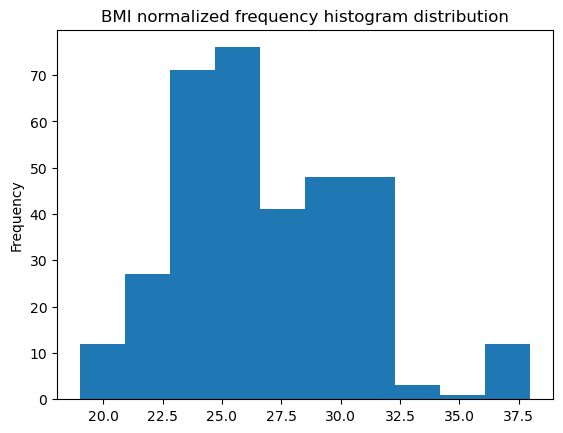

In [125]:
#plot the bmi distribution of the absentees
df_Absentees['Body mass index'].plot(kind='hist', title='BMI normalized frequency histogram distribution');

In [126]:
#view the spread of the target column
df['Absenteeism time in hours'].describe() 

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

In [127]:
#check the class balance of the target column
df['Absent'].value_counts(normalize=True)

0    0.541892
1    0.458108
Name: Absent, dtype: float64

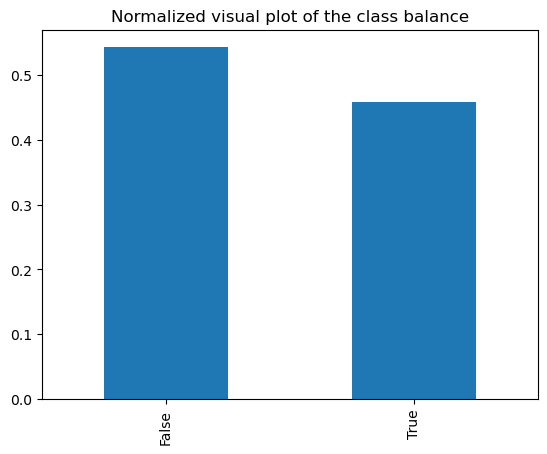

In [128]:
 #visualize to check for imbalance 
df['mask'].value_counts(normalize = True).plot(kind='bar', title = 'Normalized visual plot of the class balance');

In [129]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,mask,Absent,Medical Reasons
0,11,26,7,3,1,289,36,13,33,239554,...,1,0,1,90,172,30,4,True,1,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,0,0,98,178,31,0,False,0,0
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,0,89,170,31,2,False,0,1
3,7,7,7,5,1,279,5,14,39,239554,...,1,1,0,68,168,24,4,True,1,1
4,11,23,7,5,1,289,36,13,33,239554,...,1,0,1,90,172,30,2,False,0,1


In [130]:
#pearson correlation of the features
df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,mask,Absent,Medical Reasons
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997,-0.151930,-0.151930,-0.023085
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116,-0.182570,-0.182570,0.661665
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345,0.066388,0.066388,-0.076802
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361,-0.101446,-0.101446,0.049080
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615,-0.086945,-0.086945,-0.116154
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585,0.246761,0.246761,-0.111365
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363,0.009341,0.009341,0.073767
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029,-0.074167,-0.074167,0.023555
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760,-0.037933,-0.037933,-0.119782
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749,0.041579,0.041579,-0.030824


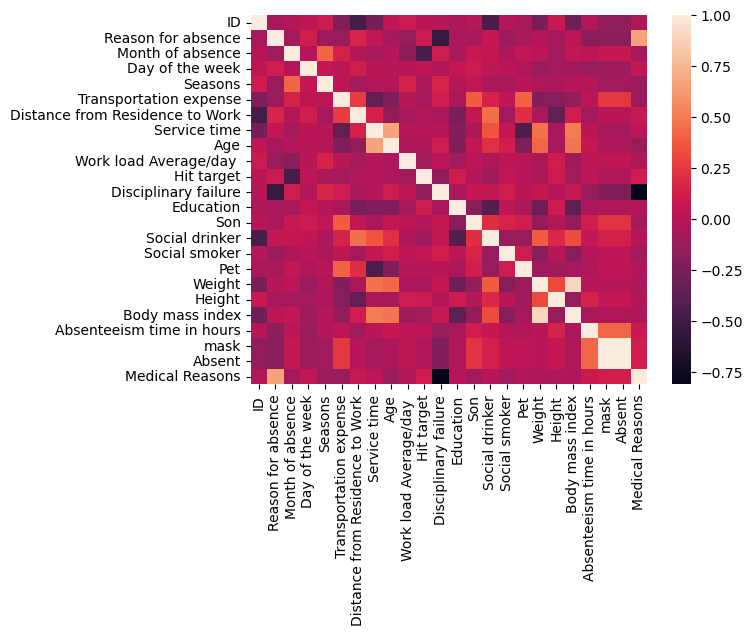

In [131]:
#correlation plot of the features with seaborn
sns.heatmap(df.corr());

In [132]:
 #Age shows a high positive correlation with Service time
df['Age'].corr(df['Service time']) 

0.6709789169180517

In [133]:
#Weight shows high positive correlation with BMI
df['Weight'].corr(df['Body mass index']) 

0.9041169005730304

In [134]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification







In [135]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'mask', 'Absent', 'Medical Reasons'],
      dtype='object')

In [136]:
drop_cols =['Reason for absence','ID','mask', 'Weight', 'Service time','Absenteeism time in hours','mask']

In [137]:
df.drop(columns=drop_cols, inplace = True) #drop the columns assigned above

In [138]:
df.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absent,Medical Reasons
0,7,3,1,289,36,33,239554,97,0,1,2,1,0,1,172,30,1,1
1,7,3,1,118,13,50,239554,97,1,1,1,1,0,0,178,31,0,0
2,7,4,1,179,51,38,239554,97,0,1,0,1,0,0,170,31,0,1
3,7,5,1,279,5,39,239554,97,0,1,2,1,1,0,168,24,1,1
4,7,5,1,289,36,33,239554,97,0,1,2,1,0,1,172,30,0,1


In [139]:
Training_Accuracy_baseline = df['Absent'].value_counts(normalize=True).max() #establish baseline accuracy as the majority class

In [140]:
print('Baseline accuracy:', round(Training_Accuracy_baseline, 2))

Baseline accuracy: 0.54


In [141]:
target='Absent' #creating the target vector

In [142]:
y=df[target] 
drop_cols=['Absent'] 
X=df.drop(drop_cols, axis = 1)  #create feature matrix and target


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (592, 17)
y_train shape: (592,)
X_test shape: (148, 17)
y_test shape: (148,)


In [144]:
baseline_accuracy_score =y_train.value_counts(normalize=True).max()

print('baseline accuracy score:', round(baseline_accuracy_score, 2) )

baseline accuracy score: 0.54


In [145]:
model = LogisticRegression()

In [146]:
model.fit(X_train, y_train)

LogisticRegression()

In [147]:




# The coefficients are in the coef_ attribute
print(model.coef_)


[[ 8.12334625e-05 -6.55772016e-05 -5.01518839e-05  6.64201171e-03
   7.78520489e-06 -2.71820545e-04 -5.43586616e-06 -3.52490611e-04
  -1.82873074e-05 -9.49345048e-06  9.10216050e-05  2.27720617e-05
   1.35247894e-06  2.89195435e-05 -4.01361599e-04 -1.83239388e-04
   9.22357010e-06]]


In [148]:
accuracy_score(y_train, model.predict(X_train))

0.6131756756756757

In [149]:
acc_train = accuracy_score(y_train, model.predict(X_train))
round(acc_train, 2)

0.61

In [150]:
model.score(X_test, y_test)

0.5878378378378378

In [151]:
cm = confusion_matrix(y_test, model.predict(X_test)) #confusion matrix for test set
cm

array([[52, 29],
       [32, 35]], dtype=int64)

In [152]:
features = X.columns #we get the features that were encoded from the pipeline

In [153]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [154]:
model2 =  DecisionTreeClassifier(random_state=42)


In [155]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [156]:
Training_Accuracy2= model2.score(X_train, y_train)

print('Model2(Decision Tree) Training Accuracy:', Training_Accuracy2)

Model2(Decision Tree) Training Accuracy: 0.9594594594594594


In [157]:
accuracy_score(y_train, model2.predict(X_train))

0.9594594594594594

In [158]:
Test_Accuracy2=model2.score(X_test, y_test)
print('Model 2 (Decision Tree)Test Score:',round(Test_Accuracy2, 2) )

Model 2 (Decision Tree)Test Score: 0.7


In [159]:
cm = confusion_matrix(y_test, model2.predict(X_test))
cm

array([[59, 22],
       [23, 44]], dtype=int64)

In [160]:

y_pred = model2.predict(X_test)  # Use X_test, not y_train
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72        81
           1       0.67      0.66      0.66        67

    accuracy                           0.70       148
   macro avg       0.69      0.69      0.69       148
weighted avg       0.70      0.70      0.70       148



In [162]:
model2.get_depth()

17

In [ ]:
depth_hyperparams = range(1,18)

In [ ]:
training_accuracy = []
test_accuracy=[]


for n in depth_hyperparams:
    test_model=make_pipeline(DecisionTreeClassifier(random_state=42 , max_depth=n))
    
    test_model.fit(X_train, y_train)
    
    training_accuracy.append(test_model.score(X_train, y_train))
    
    test_accuracy.append(test_model.score(X_test, y_test))
    
    
    

In [ ]:


plt.plot(depth_hyperparams, training_accuracy, label='Training Accuracy')
plt.plot(depth_hyperparams, test_accuracy, label='Test Accuracy')

plt.title('Training Accuracy vs Test Accuracy')  # Title of the plot
plt.xlabel('Depth')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()  # Adds a legend using the labels specified in the plot() calls

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model2.named_steps['decisiontreeclassifier'],
    feature_names= X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

In [ ]:


# Create a decision tree classifier with a maximum depth of 5
best_model = DecisionTreeClassifier(max_depth=16)

# Train the decision tree model using your training data
best_model.fit(X_train, y_train)
best_model.score(X_train, y_train)
f'Training accuracy of the best model from the hyperparameter tuning is {best_model.score(X_train, y_train)}'

In [ ]:
f'The test accuracy for the best model from the hyperparameter tuning is {best_model.score(X_test, y_test)}'

In [ ]:


feature_importances = pd.DataFrame(model.coef_[0], index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


In [165]:
features=X.columns
importances2 = model2.feature_importances_





In [166]:
Decision_Tree_Feature_Importances = pd.Series(importances2, index=features).sort_values()

In [170]:
Logistic_Regression_Feature_Importances = pd.Series(model.coef_[0], index=features).sort_values()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

probability = sigmoid(Logistic_Regression_Feature_Importances)
print(probability)

Height                             0.499900
Hit target                         0.499912
Age                                0.499932
Body mass index                    0.499954
Day of the week                    0.499984
Seasons                            0.499987
Disciplinary failure               0.499995
Education                          0.499998
Work load Average/day              0.499999
Social smoker                      0.500000
Distance from Residence to Work    0.500002
Medical Reasons                    0.500002
Social drinker                     0.500006
Pet                                0.500007
Month of absence                   0.500020
Son                                0.500023
Transportation expense             0.501660
dtype: float64


In [168]:
#log odds of the features
print( Logistic_Regression_Feature_Importances.sort_values(ascending=False))

Transportation expense             0.006642
Son                                0.000091
Month of absence                   0.000081
Pet                                0.000029
Social drinker                     0.000023
Medical Reasons                    0.000009
Distance from Residence to Work    0.000008
Social smoker                      0.000001
Work load Average/day             -0.000005
Education                         -0.000009
Disciplinary failure              -0.000018
Seasons                           -0.000050
Day of the week                   -0.000066
Body mass index                   -0.000183
Age                               -0.000272
Hit target                        -0.000352
Height                            -0.000401
dtype: float64


In [ ]:
Decision_Tree_Feature_Importances.sum()

In [ ]:
#Decision_Tree_Feature_Importances.drop('mask_lower',  inplace = True)

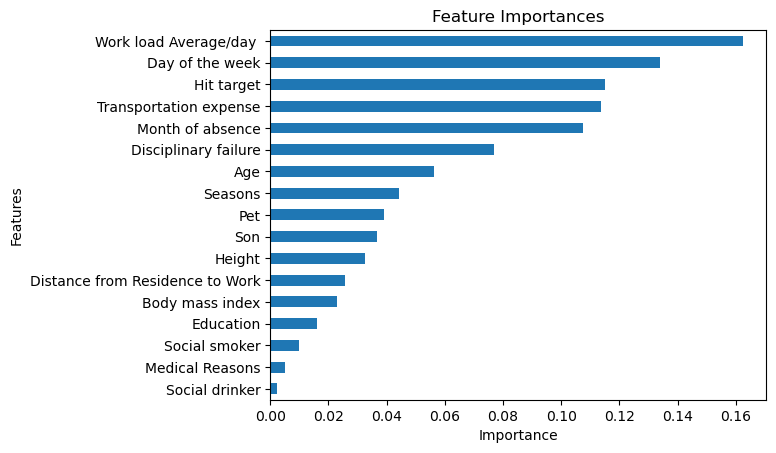

In [169]:
#Model interpretation
import matplotlib.pyplot as plt

Decision_Tree_Feature_Importances.plot(kind='barh')

plt.title('Feature Importances')  # Title of the plot
plt.xlabel('Importance')  # Label for the x-axis
plt.ylabel('Features')  # Label for the y-axis

plt.show()


In [ ]:
import pickle


with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
import pickle


with open('model2.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
from joblib import dump, load

# Save the model
dump(model, 'model.joblib')

# Load the model



In [ ]:
dump(model2, 'model2.joblib')

In [ ]:
pip freeze > requirements.txt

In [ ]:
#!pip install pipreqs
#!pipreqs ./ --force


In [ ]:
--force